In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
meta_df = pd.read_csv('symbols_valid_meta.csv')
print("Total Tickers:", len(meta_df))
# Show first few rows to confirm
meta_df.head()
print(meta_df.columns.tolist())


Total Tickers: 8049
['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange', 'Market Category', 'ETF', 'Round Lot Size', 'Test Issue', 'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares']


In [3]:
# Filter Stocks
filtered = meta_df[(meta_df['ETF'] == 'N') & (meta_df['Symbol'].notnull())]
tickers = filtered['Symbol'].unique()[:1]  # You can change the number here
print("Selected ticker:", tickers[0])
ticker = 'AAPL'

# Download Stock Price Data
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
df = df[['Close']]
print("Downloaded data shape:", df.shape)
print(df.head())

N = 5  
for i in range(1, N + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

X = df[[f'lag_{i}' for i in range(1, N + 1)]]
y = df['Close']

print("X shape:", X.shape)
print("y shape:", y.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing Result
print("\nModel Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Selected ticker: A
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Downloaded data shape: (1257, 1)
Price           Close
Ticker           AAPL
Date                 
2020-01-02  72.716072
2020-01-03  72.009117
2020-01-06  72.582909
2020-01-07  72.241547
2020-01-08  73.403656
X shape: (1252, 5)
y shape: (1252, 1)

Model Performance:
MSE: 8.578277213078033
R^2 Score: 0.9868476980591439


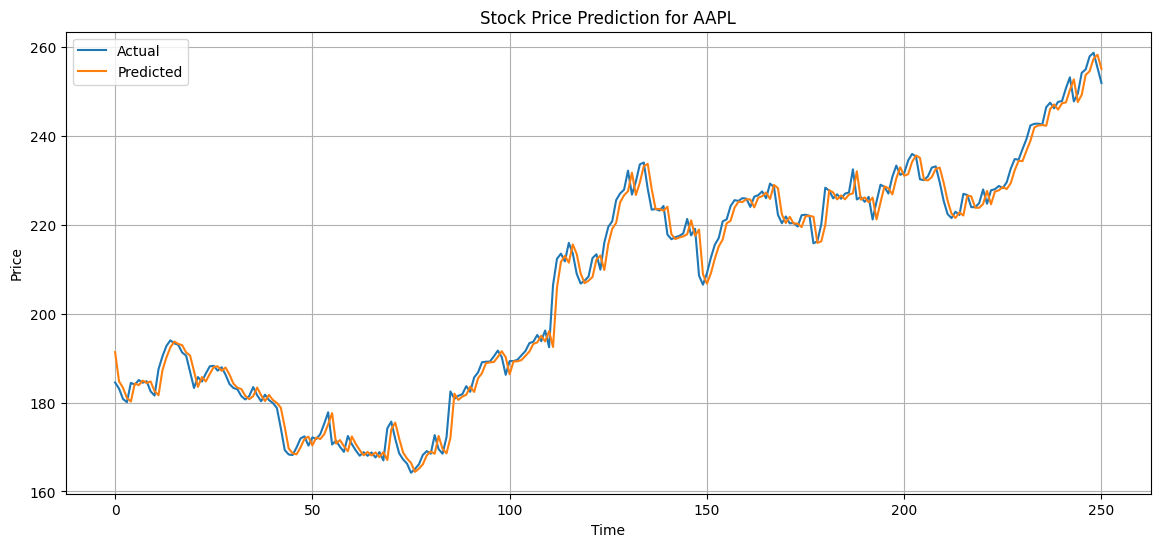

In [4]:
# The plot results

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'Stock Price Prediction for {ticker}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Advanced ML model (CNN)
